# Bar counter 

Using morphological operators

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Util

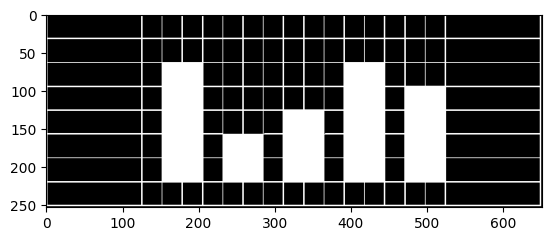

In [85]:
image = cv2.imread("histogram.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 230, 255, cv2.THRESH_BINARY)
image = np.logical_not(image)
plt.imshow(image, cmap="gray")

In [86]:
def within_image(img, coor):
    return coor[0] >= 0 and coor[0] < img.shape[0] and coor[1] >= 0 and coor[1] < img.shape[1]

In [88]:
def structural_array(structural_element, origin):
    c = []
    for i in range(structural_element.shape[0]):
        for j in range(structural_element.shape[1]):
            if structural_element[i,j]:
                c.append(np.subtract([i,j], origin))
    return c

## Bar counter

Returns a list containing the value of each bar 

In [90]:
def countBars(img):
    s = np.sum(img, axis = 0)
    from itertools import groupby
    r = [key for key, _group in groupby(s) if key]
    return r

## Morphological Operations

In [93]:
def erode(img, struct_array):
    nImg = img.copy()
    h,w = img.shape
    for i in range(h):
        for j in range(w):
            trueCounter = 0
            for c in struct_array:
                u = np.add([i,j], c)
                if within_image(img, u) and img[u[0], u[1]]:
                    trueCounter += 1 #Doesn't work for borders yet
            nImg[i, j] = trueCounter == struct_array.shape[0] 
    return nImg

# Main cell

Calls the needed functions

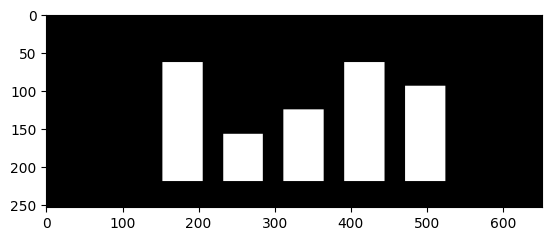

In [94]:
width = 3
e = erode(image, np.array(structural_array(np.ones((3, width)), [0, width//2])))
plt.imshow(e, cmap="gray")

In [95]:
countBars(e)

[156, 62, 94, 156, 125]